## TASK_1

## T 1.1

In [1]:
# for working with data frames
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for replacing rows with multiple conditions
import janitor

# for calculating execution time
import time

# for working with date data
import datetime as dt

# oracle
import cx_Oracle

# for ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error , mean_absolute_error

# ignoring warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
data = pd.read_excel(r'C:\Users\Ismat\OneDrive\Рабочий стол\document\etc\lesson_course\projects\Task for Candidates\loan_data.xlsx')

In [3]:
data

,MUSTERI_NO,SUBE_KOD,BRANCH_NAME,YASH,LOAN_TYPE,URUN_ADI,START_DATE,EXPIRE_DATE,DURATION,FAIZ,AMOUNT_AZN,QALIQ
0,customer3,11.00,11S,58.00,RETAIL,Əmanətçi Krediti,2022-04-25,2023-04-25,12.00,14.00,2500.00,1304.53
1,customer7,12.00,11S,51.00,RETAIL,REST PRODUCT,2019-11-18,2024-11-18,60.00,1.00,4534.63,1495.20
2,customer52,6.00,11S,42.00,RETAIL,İstehlak Krediti,2021-01-27,2023-01-27,24.00,22.00,1500.00,225.61
3,customer53,6.00,11S,30.00,RETAIL,İstehlak Krediti,2019-02-28,2023-02-28,48.00,22.00,4000.00,342.32
4,customer87,3.00,11S,41.00,RETAIL,İstehlak Krediti,2020-02-13,2023-02-13,36.00,22.00,2500.00,1576.58
...,...,...,...,...,...,...,...,...,...,...,...,...
28614,customer28473,4.00,X,54.00,RETAIL,İstehlak Krediti,2022-03-18,2024-03-18,24.00,16.00,2000.00,1499.85
28615,customer28496,6.00,X,26.00,RETAIL,İstehlak Krediti,2022-06-03,2024-06-03,24.00,16.00,6500.00,5343.79
28616,customer28503,20.00,X,27.00,RETAIL,İstehlak Krediti,2022-08-15,2025-08-15,36.00,17.00,7000.00,6548.56
28617,NaN,NaN,X,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   MUSTERI_NO   28601 non-null  object        
 1   SUBE_KOD     28602 non-null  float64       
 2   BRANCH_NAME  28619 non-null  object        
 3   YASH         28602 non-null  float64       
 4   LOAN_TYPE    28607 non-null  object        
 5   URUN_ADI     28602 non-null  object        
 6   START_DATE   28602 non-null  datetime64[ns]
 7   EXPIRE_DATE  28602 non-null  datetime64[ns]
 8   DURATION     28605 non-null  float64       
 9   FAIZ         28605 non-null  float64       
 10  AMOUNT_AZN   28602 non-null  float64       
 11  QALIQ        28602 non-null  float64       
dtypes: datetime64[ns](2), float64(6), object(4)
memory usage: 2.6+ MB


In [5]:
data.describe()

,SUBE_KOD,YASH,DURATION,FAIZ,AMOUNT_AZN,QALIQ
count,28602.00,28602.00,28605.00,28605.00,28602.00,28602.00
mean,121.87,40.23,31.39,16.60,7012.64,5429.97
std,271.63,11.43,13.79,6.45,8797.72,9918.86
min,3.00,18.00,1.00,0.00,0.00,0.01
25%,10.00,31.00,24.00,15.00,2071.23,1323.46
50%,15.00,38.00,36.00,17.00,5000.00,3184.57
75%,23.00,48.00,36.00,18.00,9000.00,6791.95
max,810.00,90.00,150.00,49.00,478265.39,989408.00


In [6]:
data.columns

Index(['MUSTERI_NO', 'SUBE_KOD', 'BRANCH_NAME', 'YASH', 'LOAN_TYPE',
       'URUN_ADI', 'START_DATE', 'EXPIRE_DATE', 'DURATION', 'FAIZ',
       'AMOUNT_AZN', 'QALIQ'],
      dtype='object')

## T 1.2

In [7]:
data.dtypes

MUSTERI_NO             object
SUBE_KOD              float64
BRANCH_NAME            object
YASH                  float64
LOAN_TYPE              object
URUN_ADI               object
START_DATE     datetime64[ns]
EXPIRE_DATE    datetime64[ns]
DURATION              float64
FAIZ                  float64
AMOUNT_AZN            float64
QALIQ                 float64
dtype: object

In [8]:
# data['YASH'] = data['YASH'].astype(int)

In [9]:
data.shape

(28619, 12)

In [10]:
data.isna().sum()

MUSTERI_NO     18
SUBE_KOD       17
BRANCH_NAME     0
YASH           17
LOAN_TYPE      12
URUN_ADI       17
START_DATE     17
EXPIRE_DATE    17
DURATION       14
FAIZ           14
AMOUNT_AZN     17
QALIQ          17
dtype: int64

<AxesSubplot:>

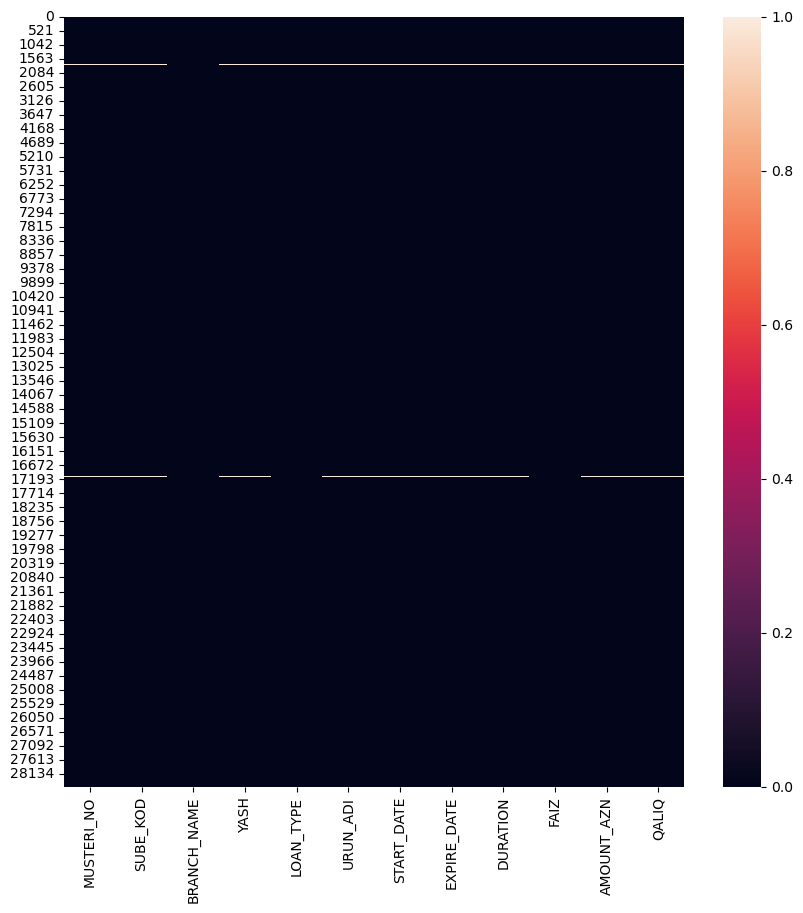

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull())

In [12]:
# data=data.dropna()
# data.isna().sum()

In [13]:
data.duplicated().sum()

4

In [14]:
data[data.duplicated()]

,MUSTERI_NO,SUBE_KOD,BRANCH_NAME,YASH,LOAN_TYPE,URUN_ADI,START_DATE,EXPIRE_DATE,DURATION,FAIZ,AMOUNT_AZN,QALIQ
1773,NaN,NaN,11S,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
12590,NaN,NaN,M,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
28553,NaN,NaN,X,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
28617,NaN,NaN,X,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN


In [15]:
# data = data.drop_duplicates()

## T 1.3

In [16]:
data = data.rename(columns={"URUN_ADI": "Product_Name"}, errors="raise")

In [17]:
data

,MUSTERI_NO,SUBE_KOD,BRANCH_NAME,YASH,LOAN_TYPE,Product_Name,START_DATE,EXPIRE_DATE,DURATION,FAIZ,AMOUNT_AZN,QALIQ
0,customer3,11.00,11S,58.00,RETAIL,Əmanətçi Krediti,2022-04-25,2023-04-25,12.00,14.00,2500.00,1304.53
1,customer7,12.00,11S,51.00,RETAIL,REST PRODUCT,2019-11-18,2024-11-18,60.00,1.00,4534.63,1495.20
2,customer52,6.00,11S,42.00,RETAIL,İstehlak Krediti,2021-01-27,2023-01-27,24.00,22.00,1500.00,225.61
3,customer53,6.00,11S,30.00,RETAIL,İstehlak Krediti,2019-02-28,2023-02-28,48.00,22.00,4000.00,342.32
4,customer87,3.00,11S,41.00,RETAIL,İstehlak Krediti,2020-02-13,2023-02-13,36.00,22.00,2500.00,1576.58
...,...,...,...,...,...,...,...,...,...,...,...,...
28614,customer28473,4.00,X,54.00,RETAIL,İstehlak Krediti,2022-03-18,2024-03-18,24.00,16.00,2000.00,1499.85
28615,customer28496,6.00,X,26.00,RETAIL,İstehlak Krediti,2022-06-03,2024-06-03,24.00,16.00,6500.00,5343.79
28616,customer28503,20.00,X,27.00,RETAIL,İstehlak Krediti,2022-08-15,2025-08-15,36.00,17.00,7000.00,6548.56
28617,NaN,NaN,X,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN


In [18]:
data = data.sort_values(by='START_DATE',ascending=False)

In [19]:
data = data.drop_duplicates(subset=['MUSTERI_NO', 'Product_Name'], keep='last')

## T 1.4

In [20]:
data['MUSTERI_NO'].isna().sum()

2

In [21]:
data['MUSTERI_NO'] = data['MUSTERI_NO'].dropna()

In [22]:
data

,MUSTERI_NO,SUBE_KOD,BRANCH_NAME,YASH,LOAN_TYPE,Product_Name,START_DATE,EXPIRE_DATE,DURATION,FAIZ,AMOUNT_AZN,QALIQ
3797,customer16003,10.00,6S,35.00,RETAIL,İstehlak Krediti,2022-11-16,2024-11-16,24.00,16.00,4000.00,4001.78
15687,customer16436,15.00,MX,32.00,RETAIL,İstehlak Krediti,2022-11-16,2025-11-16,36.00,17.00,8000.00,8003.78
17973,customer13788,22.00,N,58.00,RETAIL,İstehlak Krediti,2022-11-16,2024-11-16,24.00,16.00,6000.00,6002.67
9785,customer27245,31.00,L,27.00,RETAIL,İstehlak Krediti,2022-11-16,2023-11-16,12.00,14.00,500.00,500.19
10608,customer8376,10.00,M,32.00,RETAIL,İstehlak Krediti,2022-11-16,2026-11-16,48.00,18.00,3000.00,3001.50
...,...,...,...,...,...,...,...,...,...,...,...,...
15097,customer11504,804.00,MX,62.00,RETAIL,İstehlak Krediti,2014-05-15,2021-06-15,85.00,25.00,20000.00,19596.59
27583,customer16934,804.00,X,36.00,RETAIL,İstehlak Krediti,2011-04-18,2016-04-18,60.00,27.00,76500.00,37664.17
13987,customer2192,804.00,MX,60.00,RETAIL,İstehlak Krediti,2009-07-23,2012-07-23,36.00,27.00,64600.00,28718.90
22367,customer21390,804.00,S,53.00,RETAIL,İstehlak Krediti,2006-02-16,2007-12-16,22.00,27.00,51000.00,52878.38


## T 1.5

In [23]:
data['paid_percentage']=pd.DataFrame(round(data['AMOUNT_AZN']/data['QALIQ']*100,2))

In [24]:
data

,MUSTERI_NO,SUBE_KOD,BRANCH_NAME,YASH,LOAN_TYPE,Product_Name,START_DATE,EXPIRE_DATE,DURATION,FAIZ,AMOUNT_AZN,QALIQ,paid_percentage
3797,customer16003,10.00,6S,35.00,RETAIL,İstehlak Krediti,2022-11-16,2024-11-16,24.00,16.00,4000.00,4001.78,99.96
15687,customer16436,15.00,MX,32.00,RETAIL,İstehlak Krediti,2022-11-16,2025-11-16,36.00,17.00,8000.00,8003.78,99.95
17973,customer13788,22.00,N,58.00,RETAIL,İstehlak Krediti,2022-11-16,2024-11-16,24.00,16.00,6000.00,6002.67,99.96
9785,customer27245,31.00,L,27.00,RETAIL,İstehlak Krediti,2022-11-16,2023-11-16,12.00,14.00,500.00,500.19,99.96
10608,customer8376,10.00,M,32.00,RETAIL,İstehlak Krediti,2022-11-16,2026-11-16,48.00,18.00,3000.00,3001.50,99.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15097,customer11504,804.00,MX,62.00,RETAIL,İstehlak Krediti,2014-05-15,2021-06-15,85.00,25.00,20000.00,19596.59,102.06
27583,customer16934,804.00,X,36.00,RETAIL,İstehlak Krediti,2011-04-18,2016-04-18,60.00,27.00,76500.00,37664.17,203.11
13987,customer2192,804.00,MX,60.00,RETAIL,İstehlak Krediti,2009-07-23,2012-07-23,36.00,27.00,64600.00,28718.90,224.94
22367,customer21390,804.00,S,53.00,RETAIL,İstehlak Krediti,2006-02-16,2007-12-16,22.00,27.00,51000.00,52878.38,96.45


## T 1.6

In [25]:
data = data.dropna()

In [26]:
data['YASH'] = data['YASH'].astype(int)
data['paid_percentage'] = data['paid_percentage'].astype(int)

In [27]:
df =pd.DataFrame( {'col' :((data['paid_percentage']>60) & (data['YASH']>25) & (data['YASH']<64) & (data['LOAN_TYPE']=='RETAIL') & (data['Product_Name']=='İstehlak Krediti') & (data['BRANCH_NAME']=='UPA'))})

In [28]:
df['index']=df.index

In [29]:
df

,col,index
3797,False,3797
15687,False,15687
17973,False,17973
9785,False,9785
10608,False,10608
...,...,...
9317,False,9317
15097,False,15097
27583,False,27583
13987,False,13987


In [30]:
data['index'] = data.index
data

,MUSTERI_NO,SUBE_KOD,BRANCH_NAME,YASH,LOAN_TYPE,Product_Name,START_DATE,EXPIRE_DATE,DURATION,FAIZ,AMOUNT_AZN,QALIQ,paid_percentage,index
3797,customer16003,10.00,6S,35,RETAIL,İstehlak Krediti,2022-11-16,2024-11-16,24.00,16.00,4000.00,4001.78,99,3797
15687,customer16436,15.00,MX,32,RETAIL,İstehlak Krediti,2022-11-16,2025-11-16,36.00,17.00,8000.00,8003.78,99,15687
17973,customer13788,22.00,N,58,RETAIL,İstehlak Krediti,2022-11-16,2024-11-16,24.00,16.00,6000.00,6002.67,99,17973
9785,customer27245,31.00,L,27,RETAIL,İstehlak Krediti,2022-11-16,2023-11-16,12.00,14.00,500.00,500.19,99,9785
10608,customer8376,10.00,M,32,RETAIL,İstehlak Krediti,2022-11-16,2026-11-16,48.00,18.00,3000.00,3001.50,99,10608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9317,customer12409,804.00,L,53,RETAIL,İstehlak Krediti,2014-05-29,2017-06-29,37.00,25.00,20000.00,1742.47,1147,9317
15097,customer11504,804.00,MX,62,RETAIL,İstehlak Krediti,2014-05-15,2021-06-15,85.00,25.00,20000.00,19596.59,102,15097
27583,customer16934,804.00,X,36,RETAIL,İstehlak Krediti,2011-04-18,2016-04-18,60.00,27.00,76500.00,37664.17,203,27583
13987,customer2192,804.00,MX,60,RETAIL,İstehlak Krediti,2009-07-23,2012-07-23,36.00,27.00,64600.00,28718.90,224,13987


In [31]:
data =data.merge(df, on='index', how='left')

In [32]:
data = data.drop(['index'],axis=1)

In [33]:
data.rename(columns = {'col':'selected_customers'}, inplace = True)

In [34]:
data

,MUSTERI_NO,SUBE_KOD,BRANCH_NAME,YASH,LOAN_TYPE,Product_Name,START_DATE,EXPIRE_DATE,DURATION,FAIZ,AMOUNT_AZN,QALIQ,paid_percentage,selected_customers
0,customer16003,10.00,6S,35,RETAIL,İstehlak Krediti,2022-11-16,2024-11-16,24.00,16.00,4000.00,4001.78,99,False
1,customer16436,15.00,MX,32,RETAIL,İstehlak Krediti,2022-11-16,2025-11-16,36.00,17.00,8000.00,8003.78,99,False
2,customer13788,22.00,N,58,RETAIL,İstehlak Krediti,2022-11-16,2024-11-16,24.00,16.00,6000.00,6002.67,99,False
3,customer27245,31.00,L,27,RETAIL,İstehlak Krediti,2022-11-16,2023-11-16,12.00,14.00,500.00,500.19,99,False
4,customer8376,10.00,M,32,RETAIL,İstehlak Krediti,2022-11-16,2026-11-16,48.00,18.00,3000.00,3001.50,99,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28554,customer12409,804.00,L,53,RETAIL,İstehlak Krediti,2014-05-29,2017-06-29,37.00,25.00,20000.00,1742.47,1147,False
28555,customer11504,804.00,MX,62,RETAIL,İstehlak Krediti,2014-05-15,2021-06-15,85.00,25.00,20000.00,19596.59,102,False
28556,customer16934,804.00,X,36,RETAIL,İstehlak Krediti,2011-04-18,2016-04-18,60.00,27.00,76500.00,37664.17,203,False
28557,customer2192,804.00,MX,60,RETAIL,İstehlak Krediti,2009-07-23,2012-07-23,36.00,27.00,64600.00,28718.90,224,False


In [35]:
data['year'] = data['START_DATE'].dt.year 

In [36]:
data

,MUSTERI_NO,SUBE_KOD,BRANCH_NAME,YASH,LOAN_TYPE,Product_Name,START_DATE,EXPIRE_DATE,DURATION,FAIZ,AMOUNT_AZN,QALIQ,paid_percentage,selected_customers,year
0,customer16003,10.00,6S,35,RETAIL,İstehlak Krediti,2022-11-16,2024-11-16,24.00,16.00,4000.00,4001.78,99,False,2022
1,customer16436,15.00,MX,32,RETAIL,İstehlak Krediti,2022-11-16,2025-11-16,36.00,17.00,8000.00,8003.78,99,False,2022
2,customer13788,22.00,N,58,RETAIL,İstehlak Krediti,2022-11-16,2024-11-16,24.00,16.00,6000.00,6002.67,99,False,2022
3,customer27245,31.00,L,27,RETAIL,İstehlak Krediti,2022-11-16,2023-11-16,12.00,14.00,500.00,500.19,99,False,2022
4,customer8376,10.00,M,32,RETAIL,İstehlak Krediti,2022-11-16,2026-11-16,48.00,18.00,3000.00,3001.50,99,False,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28554,customer12409,804.00,L,53,RETAIL,İstehlak Krediti,2014-05-29,2017-06-29,37.00,25.00,20000.00,1742.47,1147,False,2014
28555,customer11504,804.00,MX,62,RETAIL,İstehlak Krediti,2014-05-15,2021-06-15,85.00,25.00,20000.00,19596.59,102,False,2014
28556,customer16934,804.00,X,36,RETAIL,İstehlak Krediti,2011-04-18,2016-04-18,60.00,27.00,76500.00,37664.17,203,False,2011
28557,customer2192,804.00,MX,60,RETAIL,İstehlak Krediti,2009-07-23,2012-07-23,36.00,27.00,64600.00,28718.90,224,False,2009


In [37]:
## total satish 
data[(data['year']==2020) | (data['year']==2021) |(data['year']==2022)]['AMOUNT_AZN'].sum()

177685551.01

## Task2

## T 2.1

In [38]:
%%time
data_2 = pd.read_excel(r'C:\Users\Ismat\OneDrive\Рабочий стол\document\etc\lesson_course\projects\Task for Candidates\sales_2021.xlsx')
data_3 = pd.read_excel(r'C:\Users\Ismat\OneDrive\Рабочий стол\document\etc\lesson_course\projects\Task for Candidates\sales_2022.xlsx')
df_union_all= pd.concat([data_2, data_3])

CPU times: total: 6.16 s
Wall time: 7.53 s


In [39]:
data_2

,MUSTERI_NO,LOAN_TYPE,BRANCH_NAME,URUN_ADI,START_DATE,EXPIRE_DATE,ACC_CLOSED_DATE,DURATION,FAIZ,AMOUNT,QALIQ
0,customer1,RETAIL,O,İstehlak kredit,2021-06-23,2023-06-23,2022-05-17,24,22.30,3000.00,0.00
1,customer2,RETAIL,O,İstehlak kredit,2021-06-24,2022-06-24,2022-06-21,12,14.30,6500.00,0.00
2,customer3,RETAIL,N,İstehlak kredit,2021-10-15,2023-10-15,2022-05-18,24,18.00,20000.00,0.00
3,customer4,RETAIL,O,İstehlak kredit,2021-04-29,2024-04-29,NaT,36,19.90,20000.00,11538.61
4,customer5,RETAIL,O,İstehlak kredit,2021-08-23,2024-08-23,2022-04-12,36,18.30,7000.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
44306,customer17747,RETAIL,11S,İstehlak kredit,2021-01-22,2024-01-22,2021-10-11,36,22.00,10000.00,0.00
44307,customer25775,RETAIL,S,İstehlak kredit,2021-03-12,2022-03-12,2021-10-25,12,14.90,3250.00,0.00
44308,customer11623,RETAIL,12S,İstehlak kredit,2021-04-20,2024-04-20,2021-06-29,36,19.90,11000.00,0.00
44309,customer21766,RETAIL,G,İstehlak kredit,2021-04-08,2023-04-08,2021-11-05,24,17.90,1500.00,0.00


In [40]:
data_3

,MUSTERI_NO,LOAN_TYPE,BRANCH_NAME,URUN_ADI,START_DATE,EXPIRE_DATE,ACC_CLOSED_DATE,DURATION,FAIZ,AMOUNT,QALIQ
0,customer1,RETAIL,SM,İstehlak kredit,2022-01-06,2024-01-06,NaT,24,17.00,6000.00,3776.94
1,customer2,RETAIL,SM,İstehlak kredit,2022-08-05,2025-08-05,NaT,36,17.00,25000.00,22369.35
2,customer3,RETAIL,MX,İstehlak kredit,2022-07-18,2023-07-18,NaT,12,13.00,1300.00,887.45
3,customer4,RETAIL,L,İstehlak kredit,2022-07-15,2025-07-15,NaT,36,17.00,5000.00,4739.34
4,customer5,RETAIL,SM,İstehlak kredit,2022-08-03,2024-08-03,NaT,24,16.00,7000.00,6291.50
...,...,...,...,...,...,...,...,...,...,...,...
22016,customer18627,RETAIL,MX,İstehlak kredit,2022-11-22,2024-11-22,NaT,24,16.00,5000.00,5006.67
22017,customer18628,RETAIL,O,İstehlak kredit,2022-11-15,2024-11-15,NaT,24,16.00,5000.00,5022.22
22018,customer18629,RETAIL,N,İstehlak kredit,2022-11-15,2025-11-15,NaT,36,17.00,18000.00,18085.00
22019,customer18630,RETAIL,28M,İstehlak kredit,2022-05-17,2024-05-17,NaT,24,16.00,5000.00,3908.66


In [41]:
df_union_all

,MUSTERI_NO,LOAN_TYPE,BRANCH_NAME,URUN_ADI,START_DATE,EXPIRE_DATE,ACC_CLOSED_DATE,DURATION,FAIZ,AMOUNT,QALIQ
0,customer1,RETAIL,O,İstehlak kredit,2021-06-23,2023-06-23,2022-05-17,24,22.30,3000.00,0.00
1,customer2,RETAIL,O,İstehlak kredit,2021-06-24,2022-06-24,2022-06-21,12,14.30,6500.00,0.00
2,customer3,RETAIL,N,İstehlak kredit,2021-10-15,2023-10-15,2022-05-18,24,18.00,20000.00,0.00
3,customer4,RETAIL,O,İstehlak kredit,2021-04-29,2024-04-29,NaT,36,19.90,20000.00,11538.61
4,customer5,RETAIL,O,İstehlak kredit,2021-08-23,2024-08-23,2022-04-12,36,18.30,7000.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
22016,customer18627,RETAIL,MX,İstehlak kredit,2022-11-22,2024-11-22,NaT,24,16.00,5000.00,5006.67
22017,customer18628,RETAIL,O,İstehlak kredit,2022-11-15,2024-11-15,NaT,24,16.00,5000.00,5022.22
22018,customer18629,RETAIL,N,İstehlak kredit,2022-11-15,2025-11-15,NaT,36,17.00,18000.00,18085.00
22019,customer18630,RETAIL,28M,İstehlak kredit,2022-05-17,2024-05-17,NaT,24,16.00,5000.00,3908.66


In [42]:
df_union_all.isna().sum()

MUSTERI_NO             0
LOAN_TYPE              0
BRANCH_NAME            0
URUN_ADI               0
START_DATE             0
EXPIRE_DATE            0
ACC_CLOSED_DATE    39910
DURATION               0
FAIZ                   0
AMOUNT                 0
QALIQ                  0
dtype: int64

## cleaning mess

In [43]:
df_union_all = df_union_all.reset_index().drop(['index'], axis=1)

In [44]:
## strip (replacing after spaces)
df_union_all = df_union_all.replace(' ', '_', regex=True)

In [45]:
df_union_all['URUN_ADI'].value_counts()

İstehlak_kredit_               39175
İstehlak_kredit                19162
Əmanətçılərə__kredit_           4453
Əməkdaşlara_kredit               998
YeloCard_Light_                  811
Əməkdaşlara_kredit_              455
YeloCard_Premium_                347
İpoteka                          263
FinTrend                         193
Əmanətçılərə__kredit_kartı_      164
İpoteka_                         119
Kredit_Kart                      101
Əmanətçilərə_kredit_karti         52
Kredit_Kart_                      39
Name: URUN_ADI, dtype: int64

In [46]:
df = df_union_all.case_when(
    # condition, value
    df_union_all.URUN_ADI.eq('İstehlak_kredit_','İstehlak_kredit') , 'İstehlak_kredit',
    df_union_all.URUN_ADI.eq('Əmanətçılərə__kredit_') , 'Əmanətçilərə_kredit',
    df_union_all.URUN_ADI.eq('Əməkdaşlara_kredit_','Əməkdaşlara_kredit') , 'Əməkdaşlara_kredit',
    df_union_all.URUN_ADI.eq('YeloCard_Light_') , 'YeloCard_Light',
    df_union_all.URUN_ADI.eq('YeloCard_Premium_') , 'YeloCard_Premium',
    df_union_all.URUN_ADI.eq('İpoteka_') , 'İpoteka',
    df_union_all.URUN_ADI.eq('FinTrend') , 'FinTrend',
    df_union_all.URUN_ADI.eq('Kredit_Kart_','Kredit_Kart') , 'Kredit_Kart',
    df_union_all.URUN_ADI.eq('Əmanətçılərə__kredit_kartı_','Əmanətçilərə_kredit_karti') , 'Əmanətçilərə_kredit_karti',
    df_union_all.URUN_ADI.eq('Əmanətçılərə__kredit_','Əmanətçılərə_kredit') , 'Əmanətçılərə_kredit',
    default=df_union_all.URUN_ADI,
    column_name = 'Product_name')

In [47]:
df = df.drop(['URUN_ADI'], axis=1)

## T 2.1

In [48]:
df['Product_name'].value_counts()

İstehlak_kredit              58337
Əmanətçilərə_kredit           4453
Əməkdaşlara_kredit            1453
YeloCard_Light                 811
İpoteka                        382
YeloCard_Premium               347
Əmanətçilərə_kredit_karti      216
FinTrend                       193
Kredit_Kart                    140
Name: Product_name, dtype: int64

In [49]:
df['LOAN_TYPE'].value_counts()

RETAIL        61552
RETAIL_DEP     2691
KART           1350
IPOTEKA         382
PARTNER         193
KART_DEP        164
Name: LOAN_TYPE, dtype: int64

In [50]:
df['BRANCH_NAME'].value_counts()

O           7408
MX          7183
X           6957
SM          5805
G           5560
M           5460
N           5305
11S         4887
MR          3369
S           3232
28M         2797
B           2714
L           2131
SDR         1298
SLY          898
12S          599
A            334
Q            202
DIGITAL_     193
Name: BRANCH_NAME, dtype: int64

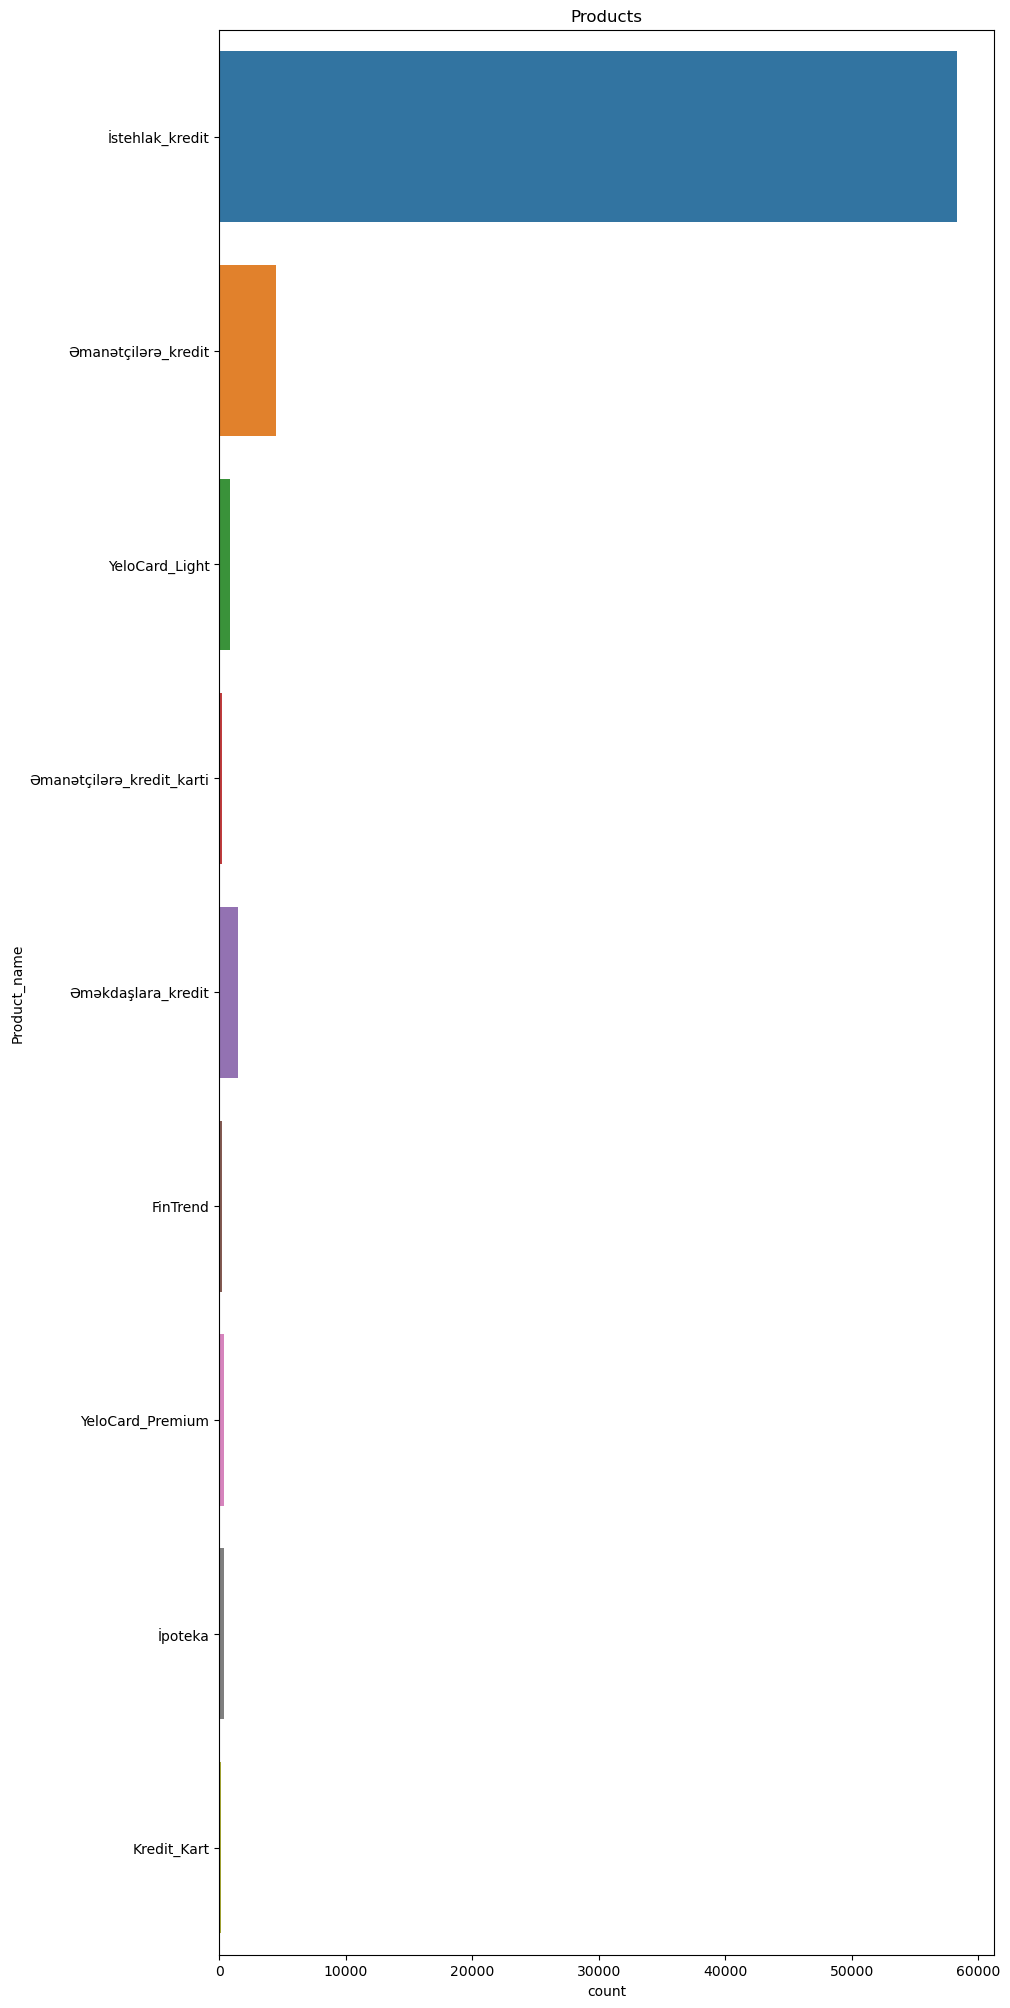

In [51]:
plt.figure(figsize=(10, 25))
sns.countplot(y=df['Product_name'])
plt.ylabel('Product_name')
plt.title('Products')
plt.show()

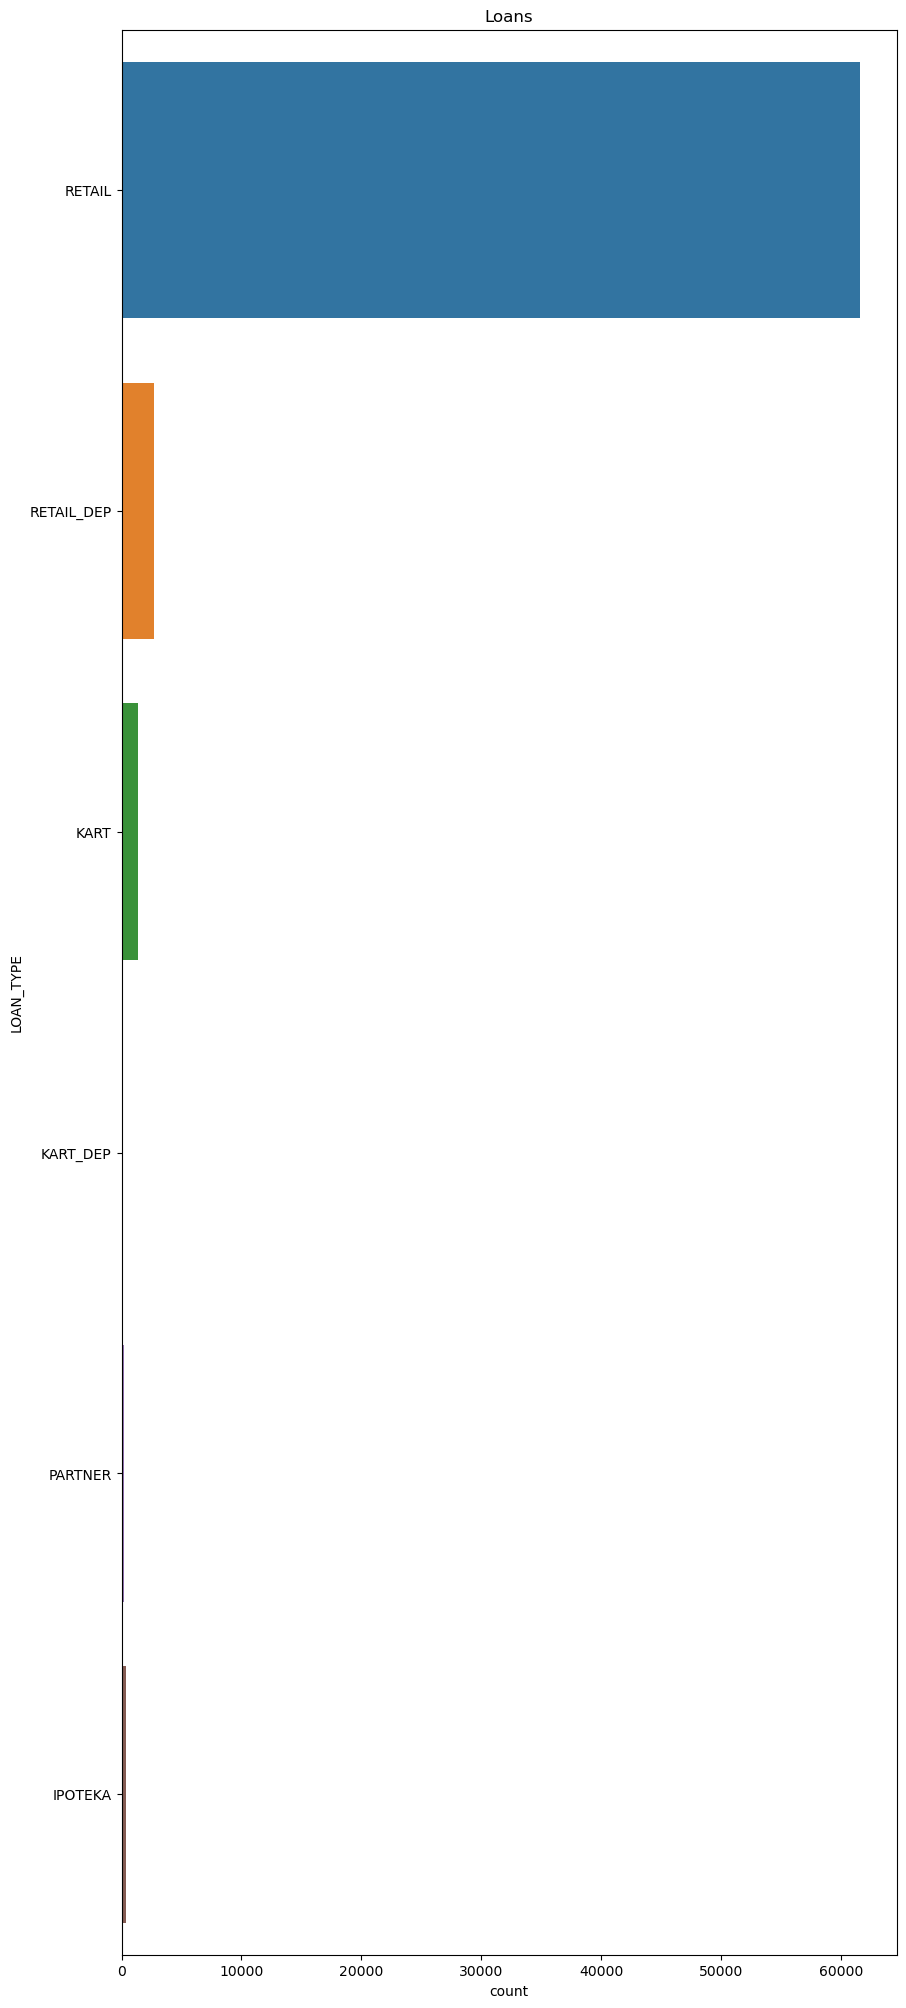

In [52]:
plt.figure(figsize=(10, 25))
sns.countplot(y=df['LOAN_TYPE'])
plt.ylabel('LOAN_TYPE')
plt.title('Loans')
plt.show()

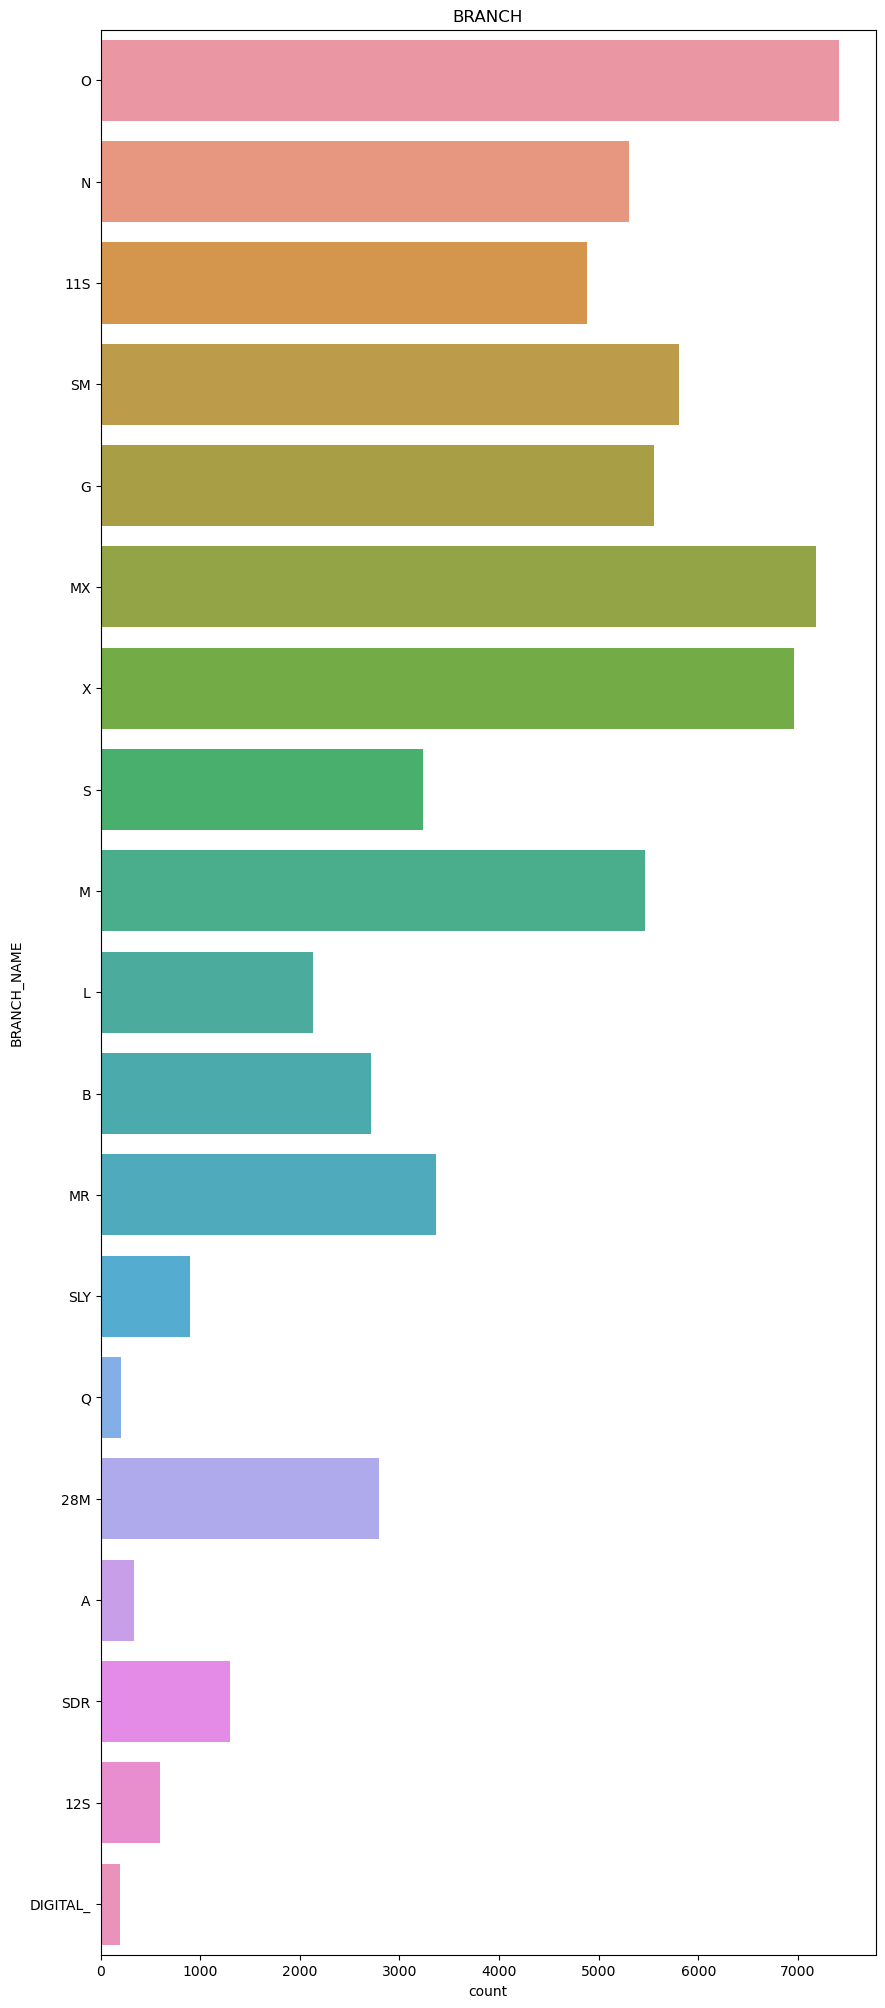

In [53]:
plt.figure(figsize=(10, 25))
sns.countplot(y=df['BRANCH_NAME'])
plt.ylabel('BRANCH_NAME')
plt.title('BRANCH')
plt.show()

In [54]:
df.dtypes

MUSTERI_NO                 object
LOAN_TYPE                  object
BRANCH_NAME                object
START_DATE         datetime64[ns]
EXPIRE_DATE        datetime64[ns]
ACC_CLOSED_DATE    datetime64[ns]
DURATION                    int64
FAIZ                      float64
AMOUNT                    float64
QALIQ                     float64
Product_name               object
dtype: object

In [55]:
df['month'] = df['START_DATE'].dt.month 
df['year'] = df['START_DATE'].dt.year 
df['weekday'] = df['START_DATE'].dt.weekday
df['quarter'] = df['START_DATE'].dt.quarter
df['dayofyear'] = df['START_DATE'].dt.dayofyear
df['day'] = df['START_DATE'].dt.day

In [56]:
df

,MUSTERI_NO,LOAN_TYPE,BRANCH_NAME,START_DATE,EXPIRE_DATE,ACC_CLOSED_DATE,DURATION,FAIZ,AMOUNT,QALIQ,Product_name,month,year,weekday,quarter,dayofyear,day
0,customer1,RETAIL,O,2021-06-23,2023-06-23,2022-05-17,24,22.30,3000.00,0.00,İstehlak_kredit,6,2021,2,2,174,23
1,customer2,RETAIL,O,2021-06-24,2022-06-24,2022-06-21,12,14.30,6500.00,0.00,İstehlak_kredit,6,2021,3,2,175,24
2,customer3,RETAIL,N,2021-10-15,2023-10-15,2022-05-18,24,18.00,20000.00,0.00,İstehlak_kredit,10,2021,4,4,288,15
3,customer4,RETAIL,O,2021-04-29,2024-04-29,NaT,36,19.90,20000.00,11538.61,İstehlak_kredit,4,2021,3,2,119,29
4,customer5,RETAIL,O,2021-08-23,2024-08-23,2022-04-12,36,18.30,7000.00,0.00,İstehlak_kredit,8,2021,0,3,235,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66327,customer18627,RETAIL,MX,2022-11-22,2024-11-22,NaT,24,16.00,5000.00,5006.67,İstehlak_kredit,11,2022,1,4,326,22
66328,customer18628,RETAIL,O,2022-11-15,2024-11-15,NaT,24,16.00,5000.00,5022.22,İstehlak_kredit,11,2022,1,4,319,15
66329,customer18629,RETAIL,N,2022-11-15,2025-11-15,NaT,36,17.00,18000.00,18085.00,İstehlak_kredit,11,2022,1,4,319,15
66330,customer18630,RETAIL,28M,2022-05-17,2024-05-17,NaT,24,16.00,5000.00,3908.66,İstehlak_kredit,5,2022,1,2,137,17


## T 2.3

In [57]:
cust_credits = pd.DataFrame({'credit_counts':df.MUSTERI_NO.value_counts()})

In [58]:
cust_credits['MUSTERI_NO'] = cust_credits.index

In [59]:
df =df.merge(cust_credits, on='MUSTERI_NO', how='left')

In [60]:
df2=df
df2.index = pd.DatetimeIndex(df2.pop('START_DATE'))
df2 = df2.sort_index().last('6M')
df2

,MUSTERI_NO,LOAN_TYPE,BRANCH_NAME,EXPIRE_DATE,ACC_CLOSED_DATE,DURATION,FAIZ,AMOUNT,QALIQ,Product_name,month,year,weekday,quarter,dayofyear,day,credit_counts
START_DATE,,,,,,,,,,,,,,,,,
2022-06-01,customer18349,RETAIL,N,2025-06-01,2022-08-29,36,17.00,7000.00,0.00,İstehlak_kredit,6,2022,2,2,152,1,3
2022-06-01,customer9674,RETAIL,SM,2022-08-18,2022-06-09,3,13.00,0.00,0.00,Əmanətçilərə_kredit,6,2022,2,2,152,1,2
2022-06-01,customer21460,RETAIL,MR,2023-06-01,2022-09-01,12,15.00,2500.00,0.00,Əməkdaşlara_kredit,6,2022,2,2,152,1,3
2022-06-01,customer29626,RETAIL,N,2025-06-01,2022-08-29,36,17.00,7000.00,0.00,İstehlak_kredit,6,2022,2,2,152,1,1
2022-06-01,customer17193,RETAIL,MX,2023-06-01,NaT,12,14.00,1000.00,605.77,İstehlak_kredit,6,2022,2,2,152,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24,customer2956,RETAIL,SDR,2025-11-24,NaT,36,17.00,13000.00,13006.14,İstehlak_kredit,11,2022,3,4,328,24,2
2022-11-24,customer10037,RETAIL,M,2023-12-30,NaT,13,13.50,30000.00,30011.25,Əmanətçilərə_kredit,11,2022,3,4,328,24,4
2022-11-24,customer6326,RETAIL,O,2024-11-24,NaT,24,14.00,50000.00,50019.44,İstehlak_kredit,11,2022,3,4,328,24,2


## T 2.5

In [61]:
new_df = df.case_when(
    df.EXPIRE_DATE < dt.datetime.now() , 'Yes',
    default='No',
    column_name='Has_closed_credit'
)

In [62]:
new_df

,MUSTERI_NO,LOAN_TYPE,BRANCH_NAME,EXPIRE_DATE,ACC_CLOSED_DATE,DURATION,FAIZ,AMOUNT,QALIQ,Product_name,month,year,weekday,quarter,dayofyear,day,credit_counts,Has_closed_credit
START_DATE,,,,,,,,,,,,,,,,,,
2021-06-23,customer1,RETAIL,O,2023-06-23,2022-05-17,24,22.30,3000.00,0.00,İstehlak_kredit,6,2021,2,2,174,23,5,No
2021-06-24,customer2,RETAIL,O,2022-06-24,2022-06-21,12,14.30,6500.00,0.00,İstehlak_kredit,6,2021,3,2,175,24,4,Yes
2021-10-15,customer3,RETAIL,N,2023-10-15,2022-05-18,24,18.00,20000.00,0.00,İstehlak_kredit,10,2021,4,4,288,15,5,No
2021-04-29,customer4,RETAIL,O,2024-04-29,NaT,36,19.90,20000.00,11538.61,İstehlak_kredit,4,2021,3,2,119,29,3,No
2021-08-23,customer5,RETAIL,O,2024-08-23,2022-04-12,36,18.30,7000.00,0.00,İstehlak_kredit,8,2021,0,3,235,23,5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-22,customer18627,RETAIL,MX,2024-11-22,NaT,24,16.00,5000.00,5006.67,İstehlak_kredit,11,2022,1,4,326,22,3,No
2022-11-15,customer18628,RETAIL,O,2024-11-15,NaT,24,16.00,5000.00,5022.22,İstehlak_kredit,11,2022,1,4,319,15,2,No
2022-11-15,customer18629,RETAIL,N,2025-11-15,NaT,36,17.00,18000.00,18085.00,İstehlak_kredit,11,2022,1,4,319,15,2,No


## Task _3

## T 3.1

In [63]:
# sorted(new_df['FAIZ'])

In [64]:
new_df.describe()

,DURATION,FAIZ,AMOUNT,QALIQ,month,year,weekday,quarter,dayofyear,day,credit_counts
count,66332.00,66332.00,66332.00,66332.00,66332.00,66332.00,66332.00,66332.00,66332.00,66332.00,66332.00
mean,26.73,16.48,7670.56,4075.13,6.46,2021.66,2.12,2.49,180.53,15.33,3.00
std,22.36,2.78,13156.02,8388.16,3.06,0.47,1.45,1.02,93.45,8.66,2.06
min,0.00,3.20,0.00,0.00,1.00,2021.00,0.00,1.00,2.00,1.00,1.00
25%,12.00,14.90,2250.00,0.00,4.00,2021.00,1.00,2.00,104.00,8.00,2.00
50%,24.00,16.00,5000.00,1201.90,6.00,2022.00,2.00,2.00,181.00,15.00,3.00
75%,36.00,17.00,10000.00,5053.74,9.00,2022.00,3.00,3.00,258.00,23.00,4.00
max,360.00,39.00,950000.00,151213.11,12.00,2022.00,6.00,4.00,364.00,31.00,37.00


In [65]:
outliers=[]
def detecting(data_1):
    
    threshold=3  # BETWEEN  - 3 AND  3 ARE Z VALUES
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [66]:
outlier_datapoints = detecting(new_df['DURATION'].astype(int))
pd.DataFrame({'outliers':outlier_datapoints}).value_counts(ascending=False).head()

outliers
300         201
360          28
301          24
120          17
240          12
dtype: int64

In [67]:
outlier_datapoints = detecting(new_df['FAIZ'].astype(int))
pd.DataFrame({'outliers':outlier_datapoints}).value_counts(ascending=False).head()

outliers
25          899
300         201
8           168
7           162
39          126
dtype: int64

## T 3.3

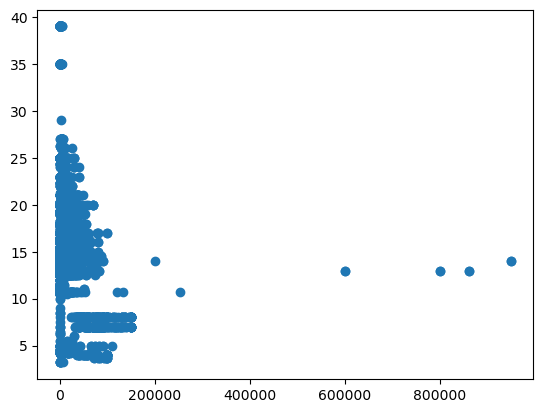

In [68]:
plt.scatter(data=new_df, x='AMOUNT',y='FAIZ')

In [69]:
def boxplot(column):
    sns.boxplot(data=new_df,x=new_df[f"{column}"])
    plt.title(f"Boxplot of Swiss Banknote {column}")
    plt.show()

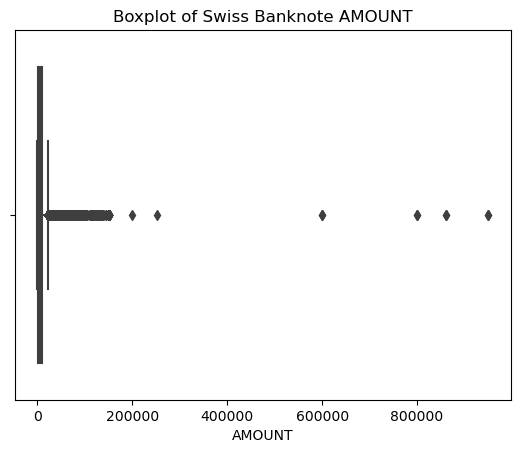

In [70]:
boxplot('AMOUNT')

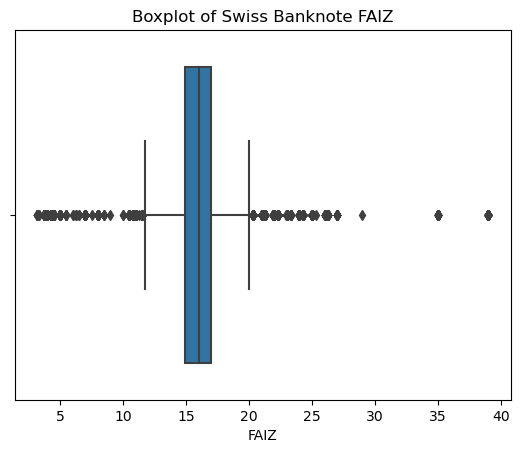

In [71]:
# greater than 35 is outliers
boxplot('FAIZ')

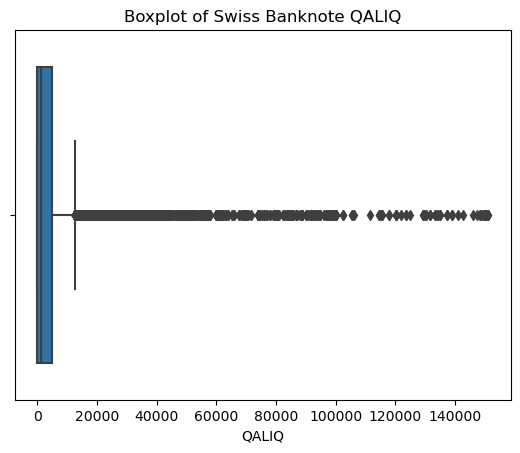

In [72]:
boxplot('QALIQ')

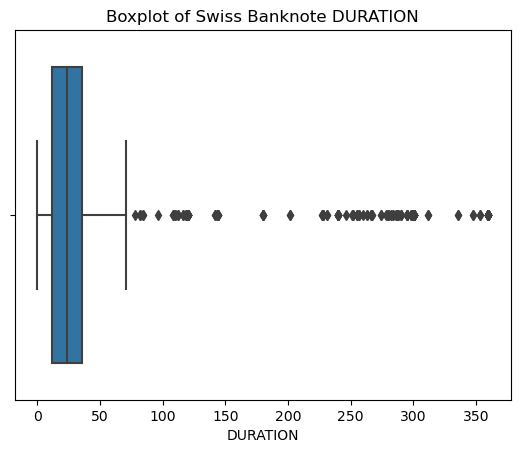

In [73]:
# if duration of loans is greater than 300 it is outliers 
boxplot('DURATION')

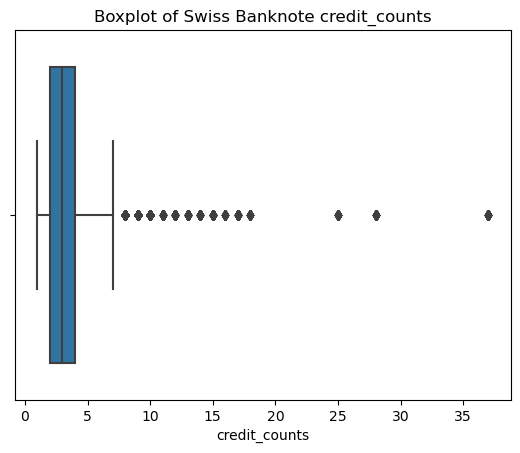

In [74]:
# greater than 24 credit count is outlier in our data
boxplot('credit_counts')

## T 3.2 

## REPLACING OUTLIERS WITH NA THEN DROP ALL NA VALUES

In [75]:
for x in ['credit_counts']:
    q75,q25 = np.percentile(new_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    new_df.loc[new_df[x] < min,x] = np.nan
    new_df.loc[new_df[x] > max,x] = np.nan

In [76]:
new_df.isna().sum()

MUSTERI_NO               0
LOAN_TYPE                0
BRANCH_NAME              0
EXPIRE_DATE              0
ACC_CLOSED_DATE      39910
DURATION                 0
FAIZ                     0
AMOUNT                   0
QALIQ                    0
Product_name             0
month                    0
year                     0
weekday                  0
quarter                  0
dayofyear                0
day                      0
credit_counts         1619
Has_closed_credit        0
dtype: int64

## T 3.4

In [77]:
new_df = new_df.dropna(axis = 0)

In [78]:
X=new_df['credit_counts']

In [79]:
random_sample = []
for i in range(100):
    random_sample.append(np.random.choice(X, 5))
random_sample = np.array(random_sample)
# 5 examples of our random samples

random_sample[:10]

array([[3., 3., 4., 5., 2.],
       [3., 3., 3., 3., 4.],
       [3., 2., 2., 5., 3.],
       [2., 3., 7., 2., 3.],
       [4., 4., 3., 4., 3.],
       [6., 1., 4., 2., 1.],
       [2., 4., 3., 1., 2.],
       [2., 4., 1., 1., 4.],
       [6., 2., 4., 1., 3.],
       [2., 3., 4., 2., 3.]])

[3.4 3.2 3.  3.4 3.6]


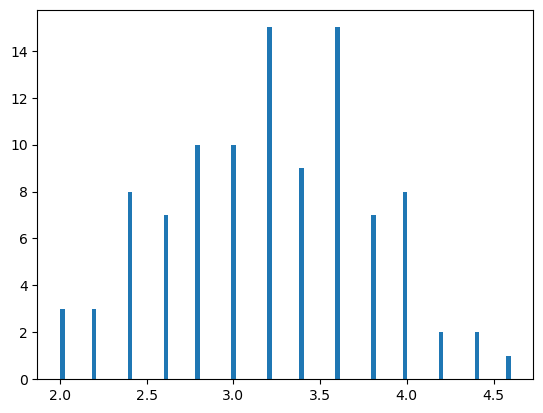

In [80]:
x_bar = random_sample.mean(axis=1)
print(x_bar[:5])
plt.hist(x_bar, bins=100);

## Task 4.7

In [81]:
# ---Bugünə qədər ən azı bir əməliyyat edən lakin heç bir taksit əməliyyatı etməyən Birkart müştəriləri hansılardır?

query = """
SELECT
    a.cif,
    c.product_type,
    c.product_name,
    b.amount,
    d.transaction_type,
    COUNT(*) op_count,
    SUM(d.amount) op_amount
FROM
    customers      a
    LEFT JOIN contracts      b ON a.cif = b.cif
    LEFT JOIN products       c ON b.product_code = c.product_code
    LEFT JOIN transactions   d ON b.account_number = d.account_number
WHERE
    NOT EXISTS (
        SELECT
            *
        FROM
            transactions e
        WHERE
            d.account_number = e.account_number
            AND e.transaction_type = 'Taksit'
    )
        AND NOT EXISTS (
        SELECT
            *
        FROM
            products p
        WHERE
            c.product_code = p.product_code
            AND p.product_code = 'GTKR'
    )
GROUP BY
    a.cif,
    c.product_type,
    c.product_name,
    b.amount,
    d.transaction_type
HAVING
    COUNT(*) > 1
ORDER BY
    op_count
    """

In [82]:
connection = cx_Oracle.connect(user="hr", password="hr",dsn='localhost/xepdb1')
pd.read_sql(query,con=connection)

,CIF,PRODUCT_TYPE,PRODUCT_NAME,AMOUNT,TRANSACTION_TYPE,OP_COUNT,OP_AMOUNT
0,1000073,Card,Visa Black,3000,Cash,2,666
1,1000073,Card,Visa Black,3000,POS,2,706
2,1000043,Card,Visa Black,5000,Online,3,1463
3,1000043,Card,Visa Black,5000,POS,3,889
4,1000073,Card,Visa Black,8200,POS,3,1687
5,1000008,Card,Visa Black,7000,POS,3,897
6,1000013,Card,Visa Black,8600,Online,4,1349
7,1000013,Card,Visa Black,8600,POS,4,1582
8,1000073,Card,Visa Black,8200,Cash,4,986


## TASK 5

In [83]:
%%time
data4 = pd.read_excel(r'C:\Users\Ismat\OneDrive\Рабочий стол\document\etc\lesson_course\projects\Task for Candidates\sales_2021.xlsx')
data5 = pd.read_excel(r'C:\Users\Ismat\OneDrive\Рабочий стол\document\etc\lesson_course\projects\Task for Candidates\sales_2022.xlsx')
df_concat= pd.concat([data4, data5])
data_loan = pd.read_excel(r'C:\Users\Ismat\OneDrive\Рабочий стол\document\etc\lesson_course\projects\Task for Candidates\loan_data.xlsx')

CPU times: total: 6.62 s
Wall time: 13.1 s


In [84]:
data_loan.isna().sum()

MUSTERI_NO     18
SUBE_KOD       17
BRANCH_NAME     0
YASH           17
LOAN_TYPE      12
URUN_ADI       17
START_DATE     17
EXPIRE_DATE    17
DURATION       14
FAIZ           14
AMOUNT_AZN     17
QALIQ          17
dtype: int64

In [85]:
data_loan = data_loan.dropna()

In [86]:
data_loan.duplicated().sum()

0

In [87]:
data_loan = data_loan.drop_duplicates()

In [88]:
# display(data_loan)

In [89]:
# data_loan = data_loan.reset_index().drop(['index'], axis=1)
# df_concat = df_concat.replace(' ', '_', regex=True)

In [90]:
# df__ = df_concat.case_when(
#     # condition, value
#     df_concat.URUN_ADI.eq('İstehlak_kredit_','İstehlak_kredit') , 'İstehlak_kredit',
#     df_concat.URUN_ADI.eq('Əmanətçılərə__kredit_') , 'Əmanətçilərə_kredit',
#     df_concat.URUN_ADI.eq('Əməkdaşlara_kredit_','Əməkdaşlara_kredit') , 'Əməkdaşlara_kredit',
#     df_concat.URUN_ADI.eq('YeloCard_Light_') , 'YeloCard_Light',
#     df_concat.URUN_ADI.eq('YeloCard_Premium_') , 'YeloCard_Premium',
#     df_concat.URUN_ADI.eq('İpoteka_') , 'İpoteka',
#     df_concat.URUN_ADI.eq('FinTrend') , 'FinTrend',
#     df_concat.URUN_ADI.eq('Kredit_Kart_','Kredit_Kart') , 'Kredit_Kart',
#     df_concat.URUN_ADI.eq('Əmanətçılərə__kredit_kartı_','Əmanətçilərə_kredit_karti') , 'Əmanətçilərə_kredit_karti',
#     df_concat.URUN_ADI.eq('Əmanətçılərə__kredit_','Əmanətçılərə_kredit') , 'Əmanətçılərə_kredit',
#     default=df_concat.URUN_ADI,
#     column_name = 'Product_name')

In [91]:
# df__ = df__.drop(['URUN_ADI'], axis=1)

In [92]:
data_loan

,MUSTERI_NO,SUBE_KOD,BRANCH_NAME,YASH,LOAN_TYPE,URUN_ADI,START_DATE,EXPIRE_DATE,DURATION,FAIZ,AMOUNT_AZN,QALIQ
0,customer3,11.00,11S,58.00,RETAIL,Əmanətçi Krediti,2022-04-25,2023-04-25,12.00,14.00,2500.00,1304.53
1,customer7,12.00,11S,51.00,RETAIL,REST PRODUCT,2019-11-18,2024-11-18,60.00,1.00,4534.63,1495.20
2,customer52,6.00,11S,42.00,RETAIL,İstehlak Krediti,2021-01-27,2023-01-27,24.00,22.00,1500.00,225.61
3,customer53,6.00,11S,30.00,RETAIL,İstehlak Krediti,2019-02-28,2023-02-28,48.00,22.00,4000.00,342.32
4,customer87,3.00,11S,41.00,RETAIL,İstehlak Krediti,2020-02-13,2023-02-13,36.00,22.00,2500.00,1576.58
...,...,...,...,...,...,...,...,...,...,...,...,...
28613,customer28459,23.00,X,41.00,RETAIL,Əmanətçi Krediti,2022-10-10,2023-03-10,5.00,13.00,4000.00,4053.44
28614,customer28473,4.00,X,54.00,RETAIL,İstehlak Krediti,2022-03-18,2024-03-18,24.00,16.00,2000.00,1499.85
28615,customer28496,6.00,X,26.00,RETAIL,İstehlak Krediti,2022-06-03,2024-06-03,24.00,16.00,6500.00,5343.79
28616,customer28503,20.00,X,27.00,RETAIL,İstehlak Krediti,2022-08-15,2025-08-15,36.00,17.00,7000.00,6548.56


In [93]:
bins = [18,30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
data_loan['age_range'] = pd.cut(data_loan.YASH, bins, labels = labels,include_lowest = True)

In [94]:
data_loan

,MUSTERI_NO,SUBE_KOD,BRANCH_NAME,YASH,LOAN_TYPE,URUN_ADI,START_DATE,EXPIRE_DATE,DURATION,FAIZ,AMOUNT_AZN,QALIQ,age_range
0,customer3,11.00,11S,58.00,RETAIL,Əmanətçi Krediti,2022-04-25,2023-04-25,12.00,14.00,2500.00,1304.53,50-59
1,customer7,12.00,11S,51.00,RETAIL,REST PRODUCT,2019-11-18,2024-11-18,60.00,1.00,4534.63,1495.20,50-59
2,customer52,6.00,11S,42.00,RETAIL,İstehlak Krediti,2021-01-27,2023-01-27,24.00,22.00,1500.00,225.61,40-49
3,customer53,6.00,11S,30.00,RETAIL,İstehlak Krediti,2019-02-28,2023-02-28,48.00,22.00,4000.00,342.32,18-29
4,customer87,3.00,11S,41.00,RETAIL,İstehlak Krediti,2020-02-13,2023-02-13,36.00,22.00,2500.00,1576.58,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28613,customer28459,23.00,X,41.00,RETAIL,Əmanətçi Krediti,2022-10-10,2023-03-10,5.00,13.00,4000.00,4053.44,40-49
28614,customer28473,4.00,X,54.00,RETAIL,İstehlak Krediti,2022-03-18,2024-03-18,24.00,16.00,2000.00,1499.85,50-59
28615,customer28496,6.00,X,26.00,RETAIL,İstehlak Krediti,2022-06-03,2024-06-03,24.00,16.00,6500.00,5343.79,18-29
28616,customer28503,20.00,X,27.00,RETAIL,İstehlak Krediti,2022-08-15,2025-08-15,36.00,17.00,7000.00,6548.56,18-29


In [95]:
data_loan['age_range'].value_counts()

30-39    10382
18-29     6472
40-49     5423
50-59     4475
60-69     1768
70+         81
Name: age_range, dtype: int64

In [96]:
data_loan[data_loan['age_range']=='30-39']['DURATION'].value_counts()

36.00     4476
24.00     2478
12.00     1052
60.00      865
48.00      504
          ... 
51.00        1
82.00        1
44.00        1
146.00       1
116.00       1
Name: DURATION, Length: 63, dtype: int64

In [97]:
data_loan['DURATION'].value_counts()

36.00     11514
24.00      6746
12.00      3108
60.00      2454
18.00      1361
          ...  
119.00        1
59.00         1
98.00         1
50.00         1
91.00         1
Name: DURATION, Length: 107, dtype: int64

In [98]:
data_loan['LOAN_TYPE'].value_counts()

RETAIL        26985
PARTNER         856
KART            757
KART_TAXIT        3
Name: LOAN_TYPE, dtype: int64

In [99]:
data_loan['URUN_ADI'].value_counts()

İstehlak Krediti    22872
REST PRODUCT         2362
Əmanətçi Krediti     1416
FinTrend              856
Kredit Kartı          314
YeloCard Light        290
CashCard              264
YeloCard Premium      120
TBCK                  104
Lizinq                  3
Name: URUN_ADI, dtype: int64

In [100]:
data_loan['month'] = data_loan['START_DATE'].dt.month 
data_loan['year'] = data_loan['START_DATE'].dt.year 
data_loan['weekday'] = data_loan['START_DATE'].dt.weekday+1
data_loan['quarter'] = data_loan['START_DATE'].dt.quarter
data_loan['dayofyear'] = data_loan['START_DATE'].dt.dayofyear
data_loan['day'] = data_loan['START_DATE'].dt.day

In [101]:
data_loan['weekday'].value_counts()

5    6288
4    5602
3    5557
2    5366
1    5210
6     361
7     217
Name: weekday, dtype: int64

In [102]:
data_loan['month'].value_counts()

9     3289
10    3151
8     2939
12    2744
11    2637
7     2476
6     2464
5     2213
4     2150
3     1723
2     1602
1     1213
Name: month, dtype: int64

In [103]:
data_loan['day'].value_counts()

5     1126
16    1072
10    1070
11    1066
14    1055
4     1025
26    1019
29    1015
15    1003
19     991
28     974
18     966
27     965
17     961
6      961
13     949
1      937
20     909
25     899
8      886
7      873
12     873
24     862
22     860
21     851
30     815
2      812
3      810
9      784
23     741
31     471
Name: day, dtype: int64

In [104]:
data_loan['month_expr'] = data_loan['EXPIRE_DATE'].dt.month 
data_loan['year_expr'] = data_loan['EXPIRE_DATE'].dt.year 
data_loan['weekday_expr'] = data_loan['EXPIRE_DATE'].dt.weekday+1
data_loan['quarter_expr'] = data_loan['EXPIRE_DATE'].dt.quarter
data_loan['dayofyear_expr'] = data_loan['EXPIRE_DATE'].dt.dayofyear
data_loan['day_expr'] = data_loan['EXPIRE_DATE'].dt.day

In [105]:
data_loan

,MUSTERI_NO,SUBE_KOD,BRANCH_NAME,YASH,LOAN_TYPE,URUN_ADI,START_DATE,EXPIRE_DATE,DURATION,FAIZ,...,weekday,quarter,dayofyear,day,month_expr,year_expr,weekday_expr,quarter_expr,dayofyear_expr,day_expr
0,customer3,11.00,11S,58.00,RETAIL,Əmanətçi Krediti,2022-04-25,2023-04-25,12.00,14.00,...,1,2,115,25,4,2023,2,2,115,25
1,customer7,12.00,11S,51.00,RETAIL,REST PRODUCT,2019-11-18,2024-11-18,60.00,1.00,...,1,4,322,18,11,2024,1,4,323,18
2,customer52,6.00,11S,42.00,RETAIL,İstehlak Krediti,2021-01-27,2023-01-27,24.00,22.00,...,3,1,27,27,1,2023,5,1,27,27
3,customer53,6.00,11S,30.00,RETAIL,İstehlak Krediti,2019-02-28,2023-02-28,48.00,22.00,...,4,1,59,28,2,2023,2,1,59,28
4,customer87,3.00,11S,41.00,RETAIL,İstehlak Krediti,2020-02-13,2023-02-13,36.00,22.00,...,4,1,44,13,2,2023,1,1,44,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28613,customer28459,23.00,X,41.00,RETAIL,Əmanətçi Krediti,2022-10-10,2023-03-10,5.00,13.00,...,1,4,283,10,3,2023,5,1,69,10
28614,customer28473,4.00,X,54.00,RETAIL,İstehlak Krediti,2022-03-18,2024-03-18,24.00,16.00,...,5,1,77,18,3,2024,1,1,78,18
28615,customer28496,6.00,X,26.00,RETAIL,İstehlak Krediti,2022-06-03,2024-06-03,24.00,16.00,...,5,2,154,3,6,2024,1,2,155,3
28616,customer28503,20.00,X,27.00,RETAIL,İstehlak Krediti,2022-08-15,2025-08-15,36.00,17.00,...,1,3,227,15,8,2025,5,3,227,15


In [106]:
data_loan['month_expr'].value_counts()

9     3028
12    2896
10    2892
8     2715
11    2549
6     2416
7     2382
4     2302
5     2247
3     1921
2     1829
1     1424
Name: month_expr, dtype: int64

In [107]:
data_loan['year_expr'].value_counts()

2024    9922
2023    7405
2025    7162
2022    1720
2021    1313
2026     756
2020     243
2018      28
2019      22
2027      19
2016       3
2017       3
2015       2
2012       1
2007       1
2029       1
Name: year_expr, dtype: int64

In [108]:
data_loan['weekday_expr'].value_counts()

5    5037
6    4982
7    4654
1    4391
2    4146
4    2915
3    2476
Name: weekday_expr, dtype: int64

In [109]:
data_loan

,MUSTERI_NO,SUBE_KOD,BRANCH_NAME,YASH,LOAN_TYPE,URUN_ADI,START_DATE,EXPIRE_DATE,DURATION,FAIZ,...,weekday,quarter,dayofyear,day,month_expr,year_expr,weekday_expr,quarter_expr,dayofyear_expr,day_expr
0,customer3,11.00,11S,58.00,RETAIL,Əmanətçi Krediti,2022-04-25,2023-04-25,12.00,14.00,...,1,2,115,25,4,2023,2,2,115,25
1,customer7,12.00,11S,51.00,RETAIL,REST PRODUCT,2019-11-18,2024-11-18,60.00,1.00,...,1,4,322,18,11,2024,1,4,323,18
2,customer52,6.00,11S,42.00,RETAIL,İstehlak Krediti,2021-01-27,2023-01-27,24.00,22.00,...,3,1,27,27,1,2023,5,1,27,27
3,customer53,6.00,11S,30.00,RETAIL,İstehlak Krediti,2019-02-28,2023-02-28,48.00,22.00,...,4,1,59,28,2,2023,2,1,59,28
4,customer87,3.00,11S,41.00,RETAIL,İstehlak Krediti,2020-02-13,2023-02-13,36.00,22.00,...,4,1,44,13,2,2023,1,1,44,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28613,customer28459,23.00,X,41.00,RETAIL,Əmanətçi Krediti,2022-10-10,2023-03-10,5.00,13.00,...,1,4,283,10,3,2023,5,1,69,10
28614,customer28473,4.00,X,54.00,RETAIL,İstehlak Krediti,2022-03-18,2024-03-18,24.00,16.00,...,5,1,77,18,3,2024,1,1,78,18
28615,customer28496,6.00,X,26.00,RETAIL,İstehlak Krediti,2022-06-03,2024-06-03,24.00,16.00,...,5,2,154,3,6,2024,1,2,155,3
28616,customer28503,20.00,X,27.00,RETAIL,İstehlak Krediti,2022-08-15,2025-08-15,36.00,17.00,...,1,3,227,15,8,2025,5,3,227,15


In [110]:
count_of_credits = pd.DataFrame({'credit_counts':data_loan.MUSTERI_NO.value_counts()})
count_of_credits['MUSTERI_NO'] = count_of_credits.index
data_loan =data_loan.merge(count_of_credits, on='MUSTERI_NO', how='left')

In [111]:
data_loan.columns

Index(['MUSTERI_NO', 'SUBE_KOD', 'BRANCH_NAME', 'YASH', 'LOAN_TYPE',
       'URUN_ADI', 'START_DATE', 'EXPIRE_DATE', 'DURATION', 'FAIZ',
       'AMOUNT_AZN', 'QALIQ', 'age_range', 'month', 'year', 'weekday',
       'quarter', 'dayofyear', 'day', 'month_expr', 'year_expr',
       'weekday_expr', 'quarter_expr', 'dayofyear_expr', 'day_expr',
       'credit_counts'],
      dtype='object')

In [112]:
columns = ['BRANCH_NAME','YASH','LOAN_TYPE','URUN_ADI','DURATION','FAIZ',
           'month','year','weekday','quarter','dayofyear','day',
           'month_expr','year_expr','weekday_expr','quarter_expr','dayofyear_expr','day_expr']
target = ['credit_counts']

In [113]:
dummy_data=pd.get_dummies(data_loan[columns],drop_first=True)
X =dummy_data
y= data_loan[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [114]:
# reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
# models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# print(models)

In [115]:
#  RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
Y_pred = rf.predict(X_test)

score5 = r2_score(y_test, Y_pred)
score6 = np.sqrt(mean_squared_error(y_test, Y_pred))
print(score5,score6)

-0.20386392882473192 0.17706011836240476


In [116]:
pd.DataFrame(index=['YASH', 'DURATION', 'FAIZ', 'month', 'year', 'weekday',
       'quarter', 'dayofyear', 'day', 'month_expr', 'year_expr',
       'weekday_expr', 'quarter_expr', 'dayofyear_expr', 'day_expr',
       'BRANCH_NAME_28M', 'BRANCH_NAME_6S', 'BRANCH_NAME_A', 'BRANCH_NAME_B',
       'BRANCH_NAME_DIGITAL ', 'BRANCH_NAME_G', 'BRANCH_NAME_L',
       'BRANCH_NAME_M', 'BRANCH_NAME_MR', 'BRANCH_NAME_MX', 'BRANCH_NAME_N',
       'BRANCH_NAME_O', 'BRANCH_NAME_Q', 'BRANCH_NAME_S', 'BRANCH_NAME_SDR',
       'BRANCH_NAME_SLY', 'BRANCH_NAME_SM', 'BRANCH_NAME_TBCK',
       'BRANCH_NAME_UPA', 'BRANCH_NAME_X', 'LOAN_TYPE_KART_TAXIT',
       'LOAN_TYPE_PARTNER', 'LOAN_TYPE_RETAIL', 'URUN_ADI_FinTrend',
       'URUN_ADI_Kredit Kartı', 'URUN_ADI_Lizinq', 'URUN_ADI_REST PRODUCT',
       'URUN_ADI_TBCK', 'URUN_ADI_YeloCard Light', 'URUN_ADI_YeloCard Premium',
       'URUN_ADI_İstehlak Krediti', 'URUN_ADI_Əmanətçi Krediti'],data= rf.feature_importances_).head()

,0
YASH,0.20
DURATION,0.04
FAIZ,0.07
month,0.03
year,0.01


In [117]:
# XGB
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
                       
xgb_model.fit(X_train,y_train)
Y_pred = xgb_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
score5 = r2_score(y_test, Y_pred)
score6 = np.sqrt(mean_squared_error(y_test, Y_pred))
print(score5,score6)

-0.5357023039020576 0.1999795409513495


In [118]:
pd.DataFrame(index=['YASH', 'DURATION', 'FAIZ', 'month', 'year', 'weekday',
       'quarter', 'dayofyear', 'day', 'month_expr', 'year_expr',
       'weekday_expr', 'quarter_expr', 'dayofyear_expr', 'day_expr',
       'BRANCH_NAME_28M', 'BRANCH_NAME_6S', 'BRANCH_NAME_A', 'BRANCH_NAME_B',
       'BRANCH_NAME_DIGITAL ', 'BRANCH_NAME_G', 'BRANCH_NAME_L',
       'BRANCH_NAME_M', 'BRANCH_NAME_MR', 'BRANCH_NAME_MX', 'BRANCH_NAME_N',
       'BRANCH_NAME_O', 'BRANCH_NAME_Q', 'BRANCH_NAME_S', 'BRANCH_NAME_SDR',
       'BRANCH_NAME_SLY', 'BRANCH_NAME_SM', 'BRANCH_NAME_TBCK',
       'BRANCH_NAME_UPA', 'BRANCH_NAME_X', 'LOAN_TYPE_KART_TAXIT',
       'LOAN_TYPE_PARTNER', 'LOAN_TYPE_RETAIL', 'URUN_ADI_FinTrend',
       'URUN_ADI_Kredit Kartı', 'URUN_ADI_Lizinq', 'URUN_ADI_REST PRODUCT',
       'URUN_ADI_TBCK', 'URUN_ADI_YeloCard Light', 'URUN_ADI_YeloCard Premium',
       'URUN_ADI_İstehlak Krediti', 'URUN_ADI_Əmanətçi Krediti'],data= xgb_model.feature_importances_).head()

,0
YASH,0.04
DURATION,0.03
FAIZ,0.02
month,0.06
year,0.01
